In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BOARDSIZE = 5 / 4
R_BULL = 5 / 128
R_HALFBULL = 13 / 128
S_BULL = 50
S_HALFBULL = 25
DOUBLES = 15 / 16, 1
TRIPLES = 9 / 16, 10 / 16
M_DOUBLE = 2
M_TRIPLE = 3
ZONE = np.array([6, 13, 4, 18, 1, 20, 5, 12, 9, 14, 11, 8, 16, 7, 19, 3, 17, 2, 15, 10])

PIXELS = 512  # must be even

BACKGROUND = '#00000000';
RED = 'red'
GREEN = 'green'
BLACK = 'black'
WHITE = 'ivory'


class Cible():
    def __init__(self, rayon):
        self.rayon = rayon
        self.centre = 0, 0
    
    def score(self, r, t):
        return np.arange(61)[(r <= self.rayon) * (
            S_BULL * (r <= R_BULL).astype(int) + \
            S_HALFBULL * ((R_BULL < r) & (r <= R_HALFBULL)).astype(int) + \
            (M_DOUBLE * ZONE[t]) * ((DOUBLES[0] < r) & (r <= DOUBLES[1])).astype(int) + \
            (M_TRIPLE * ZONE[t]) * ((TRIPLES[0] < r) & (r <= TRIPLES[1])).astype(int) + \
            ZONE[t] * (((R_HALFBULL < r) & (r <= TRIPLES[0])) | ((TRIPLES[1] < r) & (r <= DOUBLES[0]))).astype(int)
            )
        ]

    def couleur(self, r, t):
        return np.array([BACKGROUND, WHITE, BLACK, GREEN, RED])[
            2 * ((self.rayon < r) & (r <= BOARDSIZE)).astype(int) + \
            (r <= self.rayon) * (
            4 * (r <= R_BULL).astype(int) + \
            3 * ((R_BULL < r) & (r <= R_HALFBULL)).astype(int) + \
            (3 + (t % 2)) * (((DOUBLES[0] < r) & (r <= DOUBLES[1])) | ((TRIPLES[0] < r) & (r <= TRIPLES[1]))).astype(int) + \
            (1 + (t % 2)) * (((R_HALFBULL < r) & (r <= TRIPLES[0])) | ((TRIPLES[1] < r) & (r <= DOUBLES[0]))).astype(int)
            )
        ]
    
    def plot(self):
        edge = np.linspace(-BOARDSIZE, BOARDSIZE, PIXELS)
        xv, yv = np.meshgrid(edge, edge)
        r = np.sqrt(xv ** 2 + yv ** 2)
        theta = 180 * ((0 < xv) * np.arctan(yv / xv) + ((xv < 0) * (np.pi + np.arctan(yv / xv)))) / np.pi
        t = (((theta + 9) % 360) // 18).astype(int)  # Zone index
        
        rotCentre = lambda r, t: r * np.array([np.cos(2 * np.pi * t / 20), np.sin(2 * np.pi * t / 20)])

        plt.figure(figsize=(20,20))
        plt.axis('off')
        plt.xlim([-BOARDSIZE, BOARDSIZE])
        plt.ylim([-BOARDSIZE, BOARDSIZE])

        plt.scatter(xv, yv, c=cible.couleur(r, t).flatten(), s=7)
        
        lw = 4
        x=np.linspace(-1, 1, 200)
        for rs in R_BULL, R_HALFBULL, DOUBLES[0], DOUBLES[1], TRIPLES[0], TRIPLES[1], BOARDSIZE, cible.rayon:
            plt.plot(rs*x, rs * np.sqrt(1-x**2), c='silver', linewidth=lw)
            plt.plot(rs*x, -rs * np.sqrt(1-x**2), c='silver', linewidth=lw)

        [plt.plot([rotCentre(R_HALFBULL, i+0.5)[0], rotCentre(1, i+0.5)[0]], [rotCentre(R_HALFBULL, i+0.5)[1], rotCentre(1, i+0.5)[1]], c='silver', linewidth=lw) for i in range(20)];
        [plt.text(*rotCentre(BOARDSIZE - 0.1, i), ZONE[i], size='72', fontname='Chilanka', rotation=18*i-90+180*(10<i), c='silver', ha='center', va='center') for i in range(20)];
        
        plt.savefig(f"images/cibles/{self.rayon:.2f}.png", transparent=True, bbox_inches='tight')
        plt.close()

        
def flechette(xf=0, yf =0, color="gold", s=5):
    plt.scatter(xf, yf, marker="o", s=12 * s ** 2, linewidth=1.5 * s, color='k')
    plt.scatter(xf, yf, marker="o", s=10 * s ** 2, linewidth=s, color=color)
    plt.scatter(xf, yf, marker="x", s=120 * s ** 2, linewidth=2* s, color='k')
    plt.scatter(xf, yf, marker="x", s=100 * s ** 2, linewidth=s, color=color)


def savePiCreatureOld(a):

    t0 = lambda t: 3 * t - 1 / 2
    f0 = lambda x: 0.5 + (x - a) * x * (x + a)  # Cubic

    t1 = lambda t: 3 * a * (t - 1)
    f1 = lambda x: (1 - a) / a ** 2 * x ** 2 + (1 + 4 * (1 - a) / a) * x - 2 * a + 7 / 2
    
    t2 = lambda t: a / 6 * (3 * t - 2) + a
    f2 = lambda t: - 6 * (t - a) / a + 1 / 2

    def piCreatureShape(t, mx, my):
        return np.array([
            mx + (t <= 1 / 3) * (t0(t)) + ((1 / 3 < t) & (t <= 2 / 3)) * t1(t) + (2 / 3 < t) * t2(t),
            my + (t <= 1 / 3) * (f0(t0(t))) + ((1 / 3 < t) & (t <= 2 / 3)) * (f1(t1(t))) + (2 / 3 < t) * f2(t2(t))
        ])

    t = np.linspace(0, 1, 1000)
    fig = plt.figure(figsize=(10, 10))
    plt.axis("off")
    mx, my = 0, 0
    plt.xlim([-0.6, 0.6])
    plt.ylim([-0.6, 0.75])

    s = 5000
    inA = 0.045
    shY = 0.025
    plt.scatter(mx+a-inA, my + 0.57 + shY, s=2*s, c='black')
    plt.scatter(mx+a-inA, my  + 0.565 + shY, s=s, c='ivory')
    plt.scatter(mx+a-inA+0.01, my + 0.58 + shY, s=0.2*s, c='black')
    plt.scatter(mx+a-inA, my  + 0.6 + shY, s=0.05*s, c='ivory')
    plt.scatter(mx-a+inA, my + 0.57 + shY, s=2*s, c='black')
    plt.scatter(mx-a+inA, my  + 0.565 + shY, s=s, c='ivory')
    plt.scatter(mx-a+inA+0.01, my + 0.58 + shY, s=0.2*s, c='black')
    plt.scatter(mx-a+inA, my  + 0.6 + shY, s=0.05*s, c='ivory')

    calcul = piCreatureShape(t, mx, my)
    plt.scatter(*calcul, s=1.5*s/2, c='black')
    plt.scatter(*calcul, s=s/3, c='ivory')
    plt.plot(0.5 * np.cos(2*np.pi*t[718:769]), 0.98+ 0.5 * np.sin(2*np.pi*t[718:769]), c='black', linewidth=15.0)
    plt.savefig(f"images/piCreatures/{a:.2f}.png", transparent=True, bbox_inches='tight')
    plt.close()


t0 = lambda t, k: 3 * t - 1 / 2
f0 = lambda x, k: 0.5 + k['s'] * (x - k['a']) * x ** k['p'] * (x + k['a'])  # Cubic

t1 = lambda t, k: k['b'] * (3 * k['a'] * (t - 1) + k['a']) - k['a']
f1 = lambda x, k: (1 - k['a']) / k['a'] ** 2 * ((x + k['a']) / k['b'] - k['a']) ** 2 + (1 + 4 * (1 - k['a']) / k['a']) * ((x + k['a']) / k['b'] - k['a']) - 2 * k['a'] + 7 / 2

t2 = lambda t, k: k['a'] / k['da'] * (3 * t - 2) + k['a']
f2 = lambda x, k: - k['da'] * (x - k['a']) / k['a'] + 1 / 2

def piCreatureShape(t, **k):
    return np.array([
        k['mx'] + k['v'] * ((t <= 1 / 3) * (t0(t, k)) + ((1 / 3 < t) & (t <= 2 / 3)) * t1(t, k) + (2 / 3 < t) * t2(t, k)),
        k['my'] + k['v'] * ((t <= 1 / 3) * (f0(t0(t, k), k)) + ((1 / 3 < t) & (t <= 2 / 3)) * (f1(t1(t, k), k)) + (2 / 3 < t) * f2(t2(t, k), k))
    ])

def saveCreature(color, **k):
    t = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.xlim(np.array([-k['v']+k['mx'], k['v']+k['mx']]))
    plt.ylim(np.array([-k['v']+k['my'], k['v']+k['my']]))

    s = 2500 / k['v'] ** 1.5
    inA = 0.025 - 0.005 / k['v']
    shY = -0.03 + 0.045 / k['v']
    plt.scatter(k['mx']+k['v'] *(k['a']-inA), k['my'] + k['v'] *(0.57 + shY), s=1.5*s*k['v']**0.5, c=color)
    plt.scatter(k['mx']+k['v'] *(k['a']-inA), k['my']  + k['v'] *(0.565 + shY), s=s*k['v']**0.5, c='ivory')
    plt.scatter(k['mx']+k['v'] *(k['a']-inA)+0.01, k['my'] + k['v'] *(0.58 + shY), s=0.175*s*k['v']**0.5, c=color)
    plt.scatter(k['mx']+k['v'] *(k['a']-inA)-0.01, k['my']  + k['v'] *(0.605 + shY), s=0.05*s*k['v']**0.5, c='ivory')
    plt.scatter(k['mx']-k['v'] *(k['a']+inA), k['my'] + k['v'] *(0.57 + shY), s=1.65*s*k['v']**0.5, c=color)
    plt.scatter(k['mx']-k['v'] *(k['a']+inA), k['my']  + k['v'] *(0.565 + shY), s=1.1*s*k['v']**0.5, c='ivory')
    plt.scatter(k['mx']-k['v'] *(k['a']+inA)+0.01, k['my'] + k['v'] *(0.58 + shY), s=0.18*s*k['v']**0.5, c=color)
    plt.scatter(k['mx']-k['v'] *(k['a']+inA)-0.0075, k['my']  + k['v'] *(0.605 + shY), s=0.05*s*k['v']**0.5, c='ivory')

    calcul = piCreatureShape(np.linspace(0, 1, 100), **k)
    plt.scatter(*calcul, s=1.5*s/2, c=color)
    plt.scatter(*calcul, s=s/3, c='ivory')
    t = np.linspace(0.723 - 0.005 * k['v'], 0.764 + 0.005 * k['v'], 20)
    plt.plot(k['mx'] + k['v'] *(0.5 * np.cos(2*np.pi*t)), k['my'] + k['v'] *(0.98+ 0.5 * np.sin(2*np.pi*t)), c=color, linewidth=7.5 / k['v'] **0.5)
    plt.savefig("images/piCreature.png", transparent=True, bbox_inches='tight')
    plt.close()

In [3]:
saveCreature('k', a=.15, mx=-0.3, my=0.5, da=1, p=1, b=1, s=-1, v=1/3)

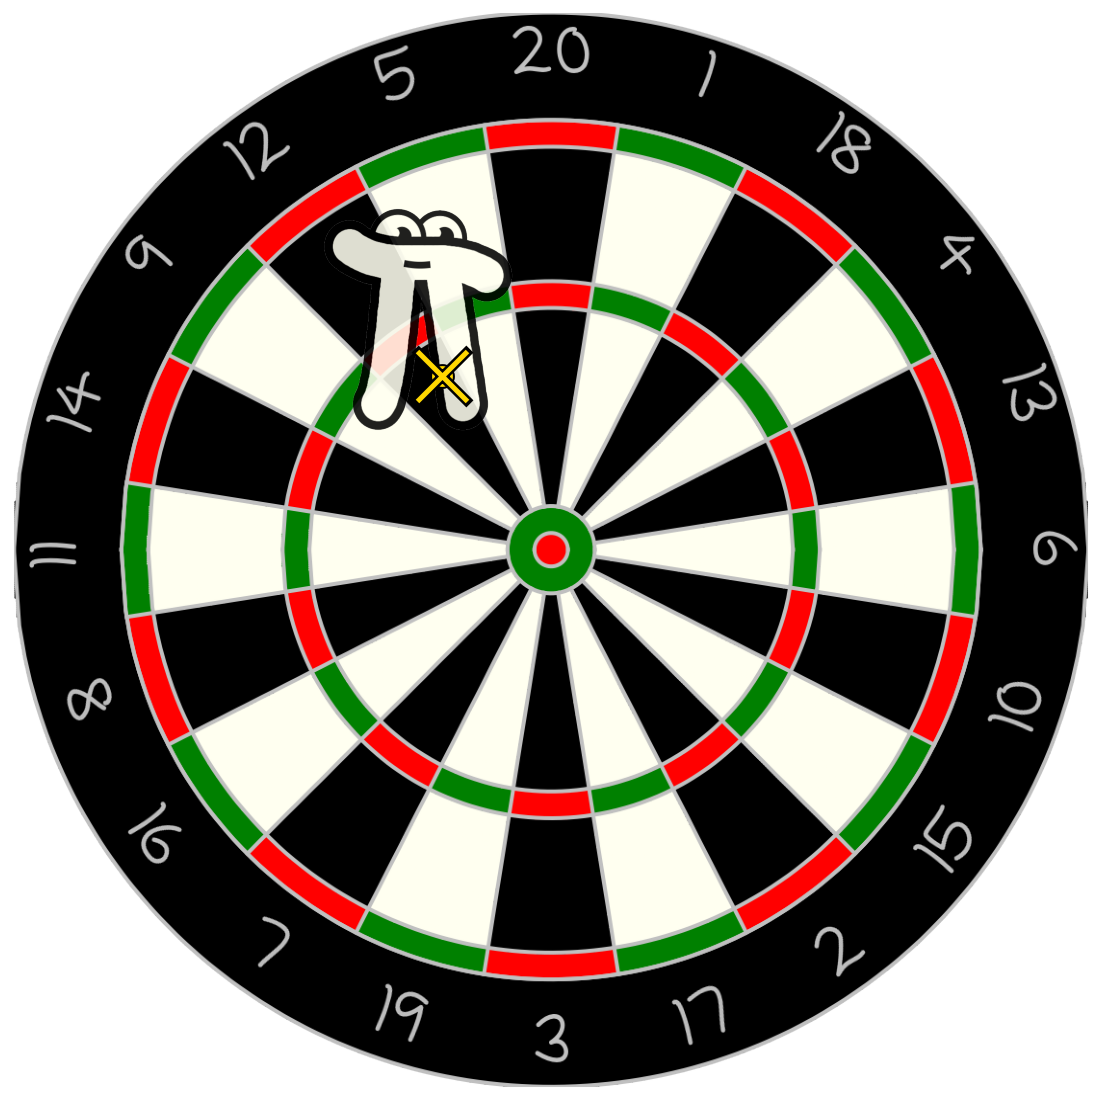

In [4]:
r = 1
cible = Cible(rayon=r)
cible.plot()
plt.figure(figsize=(20,20))
plt.axis('off')
cim = plt.imread(f"images/cibles/{r:.2f}.png")
plt.imshow(cim, extent=[-BOARDSIZE, BOARDSIZE, -BOARDSIZE, BOARDSIZE])
piCreature = plt.imread("images/piCreature.png")
v = 1/3
plt.imshow(piCreature, extent=[-v-0.3, v-0.3, -v+0.5, v+0.5], alpha=0.875)
plt.xlim([-BOARDSIZE, BOARDSIZE])
plt.ylim([-BOARDSIZE, BOARDSIZE])
flechette(-0.25, 0.4)
plt.savefig(f"images/ciblesRapport/{r:.2f}.png", transparent=True, bbox_inches='tight')


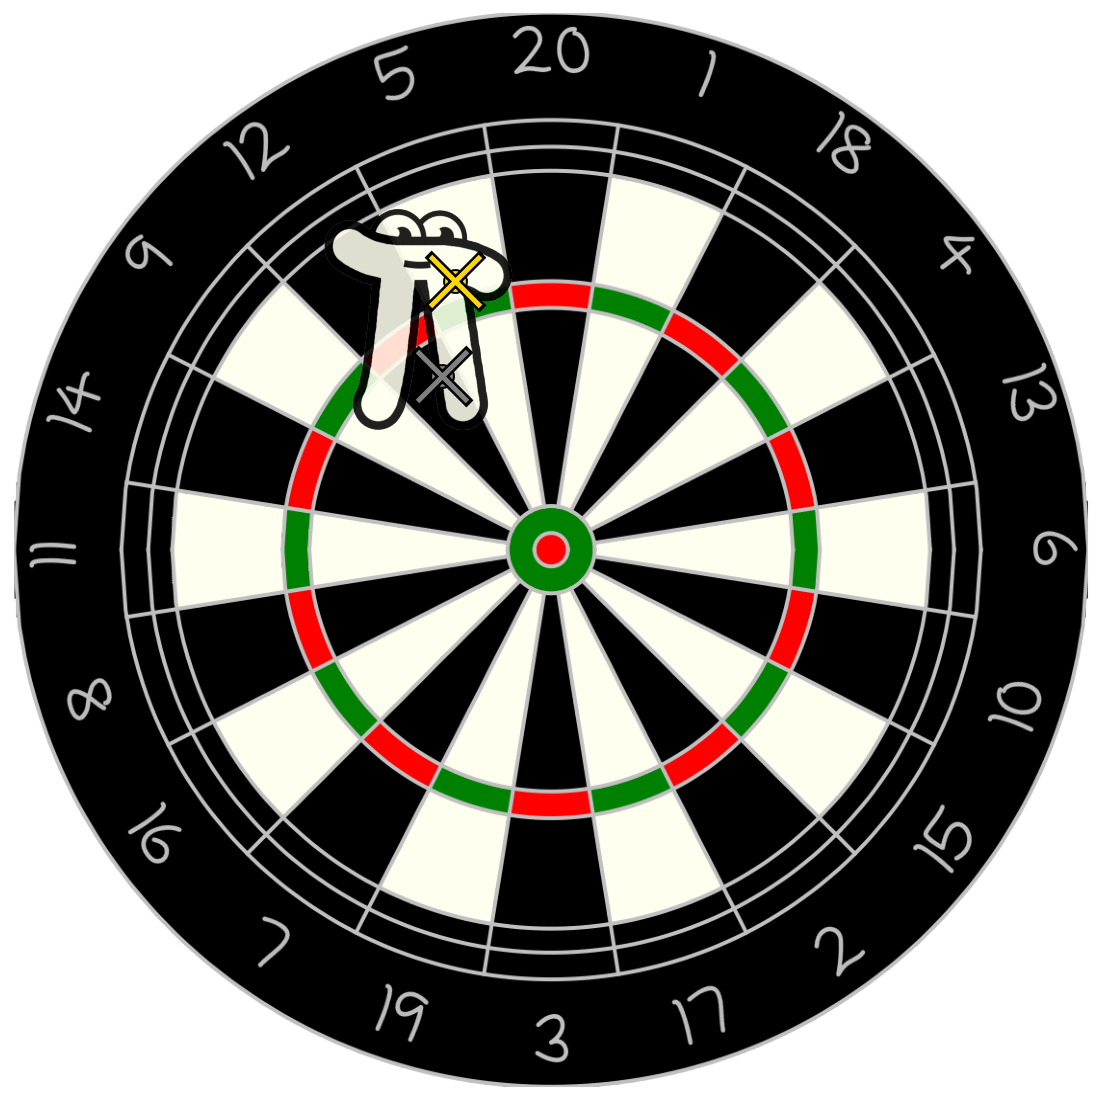

In [5]:
rf1=(1 - 0.25**2 - 0.4**2)**0.5
r = rf1
cible = Cible(rayon=r)
cible.plot()
plt.figure(figsize=(20,20))
plt.axis('off')
cim = plt.imread(f"images/cibles/{r:.2f}.png")
plt.imshow(cim, extent=[-BOARDSIZE, BOARDSIZE, -BOARDSIZE, BOARDSIZE])
piCreature = plt.imread("images/piCreature.png")
v = 1/3
plt.imshow(piCreature, extent=[-v-0.3, v-0.3, -v+0.5, v+0.5], alpha=0.875)
plt.xlim([-BOARDSIZE, BOARDSIZE])
plt.ylim([-BOARDSIZE, BOARDSIZE])
flechette(-0.25, 0.4, 'gray')
flechette(-0.22, 0.62)
plt.savefig(f"images/ciblesRapport/{r:.2f}.png", transparent=True, bbox_inches='tight')


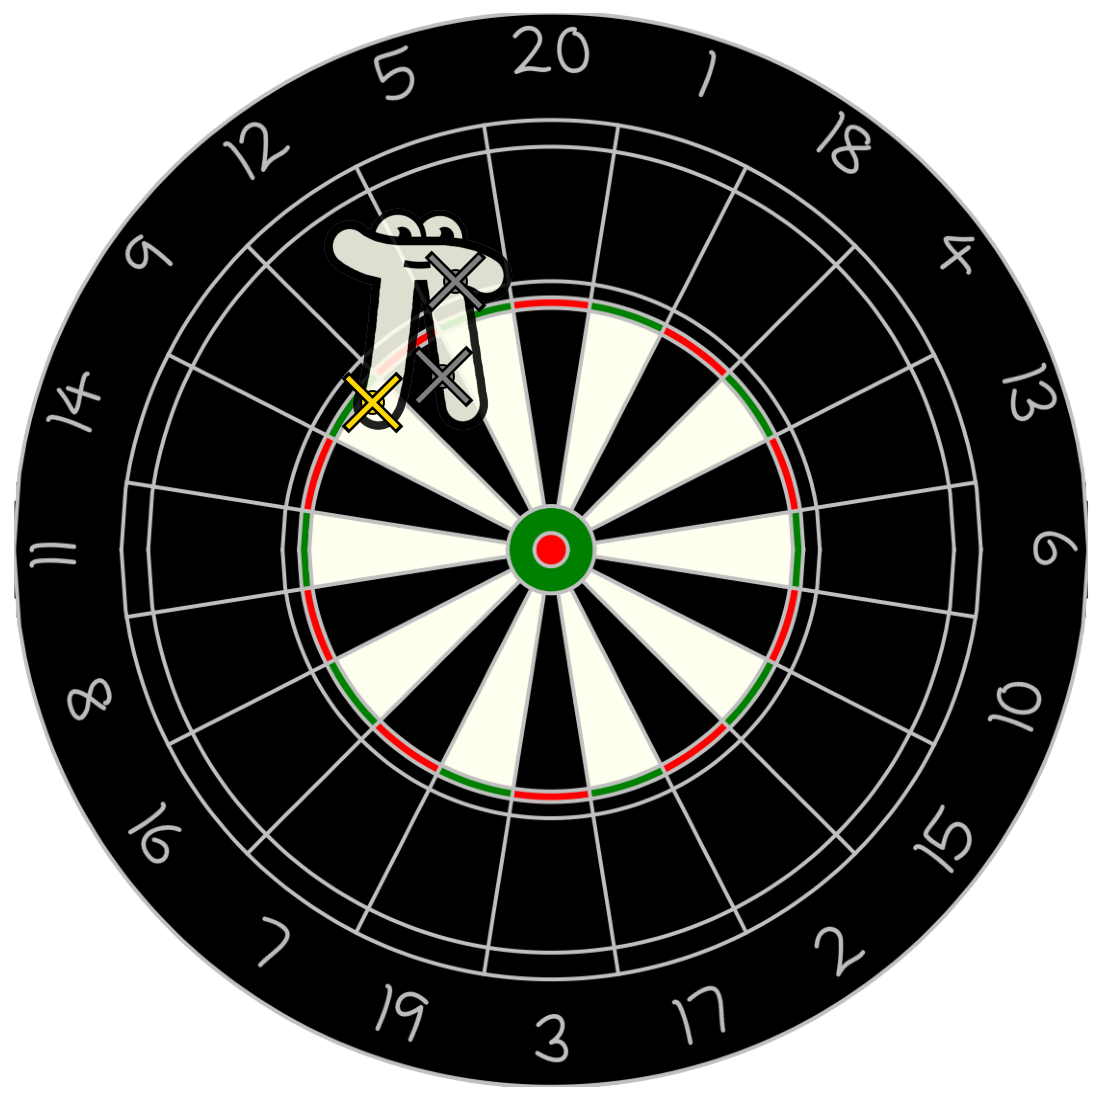

In [6]:
rf2=(rf1**2 - 0.22**2 - 0.62**2)**0.5
r = rf2
cible = Cible(rayon=r)
cible.plot()
plt.figure(figsize=(20,20))
plt.axis('off')
cim = plt.imread(f"images/cibles/{r:.2f}.png")
plt.imshow(cim, extent=[-BOARDSIZE, BOARDSIZE, -BOARDSIZE, BOARDSIZE])
piCreature = plt.imread("images/piCreature.png")
v = 1/3
plt.imshow(piCreature, extent=[-v-0.3, v-0.3, -v+0.5, v+0.5], alpha=0.875)
plt.xlim([-BOARDSIZE, BOARDSIZE])
plt.ylim([-BOARDSIZE, BOARDSIZE])
flechette(-0.25, 0.4, 'gray')
flechette(-0.22, 0.62, 'gray')
flechette(-0.41, 0.34)

plt.savefig(f"images/ciblesRapport/{r:.2f}.png", transparent=True, bbox_inches='tight')


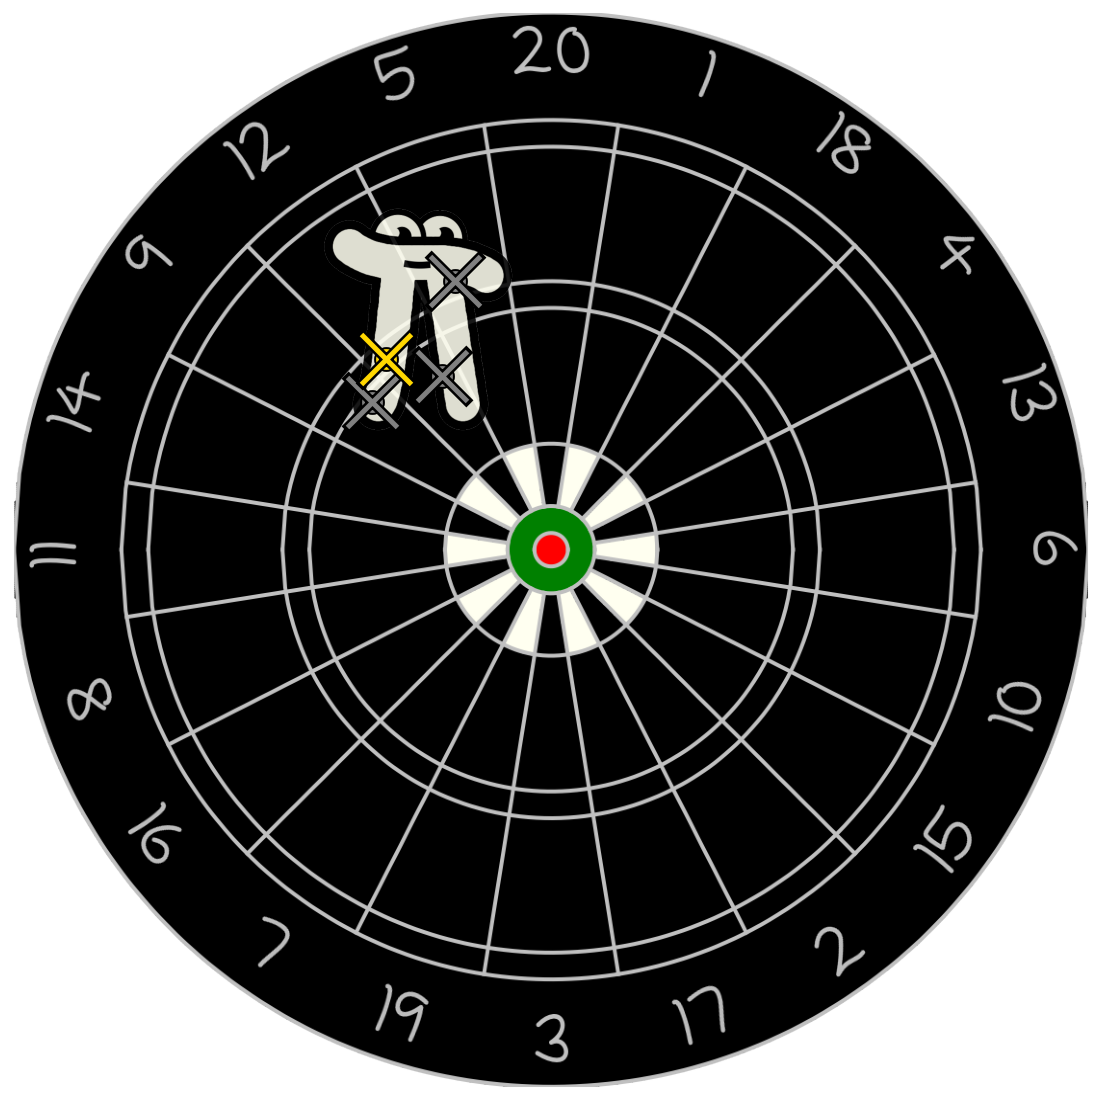

In [7]:
rf3=(rf2**2 - 0.41**2 - 0.34**2)**0.5
r = rf3
cible = Cible(rayon=r)
cible.plot()
plt.figure(figsize=(20,20))
plt.axis('off')
cim = plt.imread(f"images/cibles/{r:.2f}.png")
plt.imshow(cim, extent=[-BOARDSIZE, BOARDSIZE, -BOARDSIZE, BOARDSIZE])
piCreature = plt.imread("images/piCreature.png")
v = 1/3
plt.imshow(piCreature, extent=[-v-0.3, v-0.3, -v+0.5, v+0.5], alpha=0.875)
plt.xlim([-BOARDSIZE, BOARDSIZE])
plt.ylim([-BOARDSIZE, BOARDSIZE])
flechette(-0.25, 0.4, 'gray')
flechette(-0.22, 0.62, 'gray')
flechette(-0.41, 0.34, 'gray')
flechette(-0.38, 0.44)

plt.savefig(f"images/ciblesRapport/{r:.2f}.png", transparent=True, bbox_inches='tight')

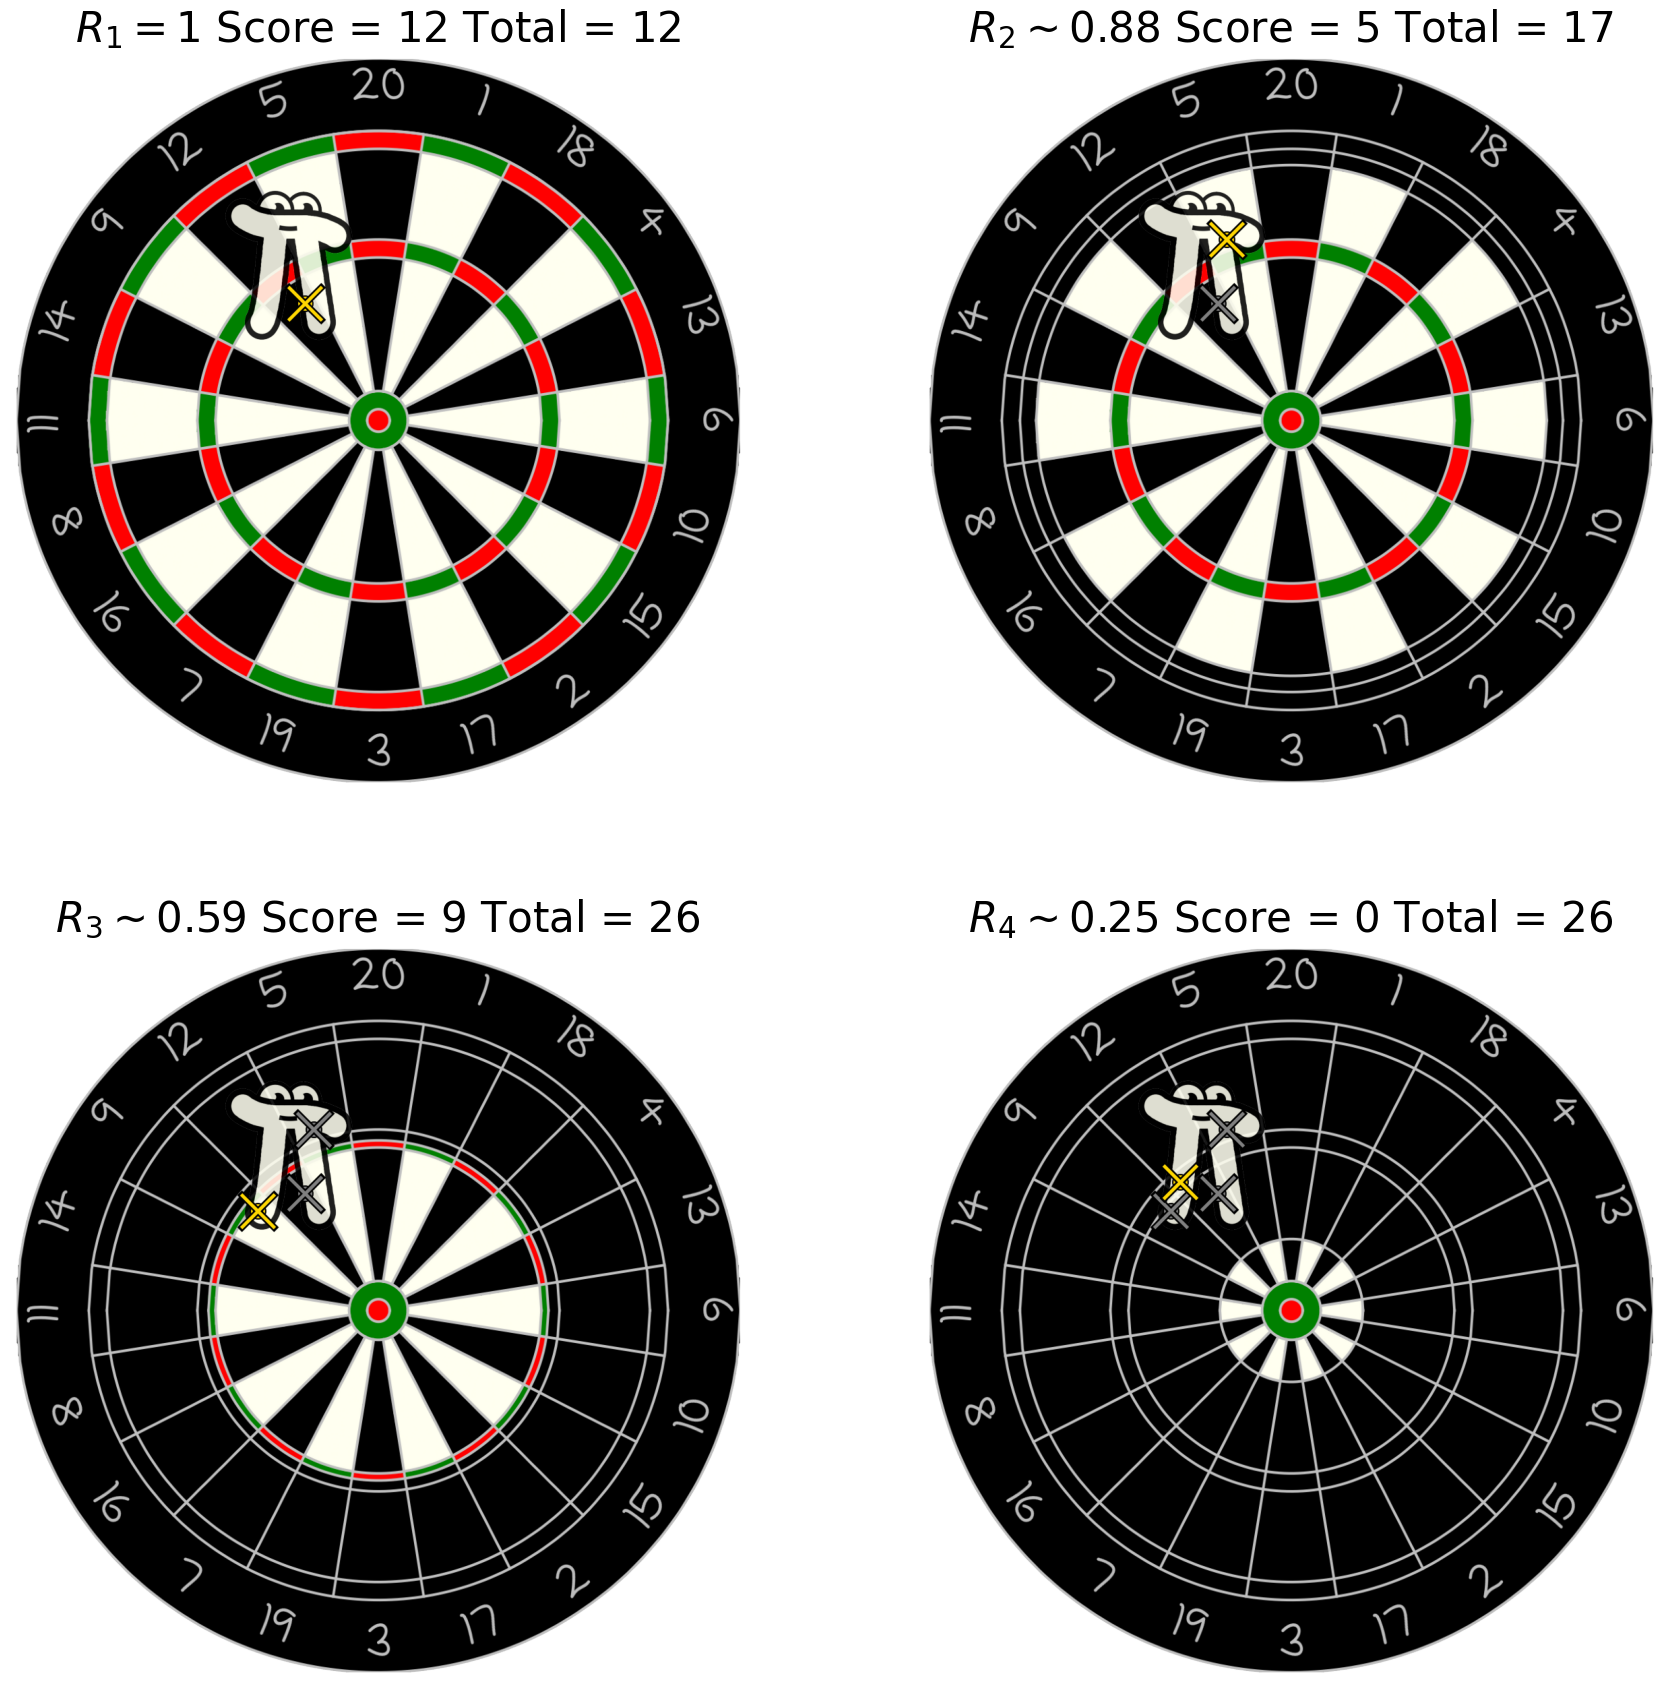

In [8]:
c1 = plt.imread("images/ciblesRapport/1.00.png")
c2 = plt.imread("images/ciblesRapport/0.88.png")
c3 = plt.imread("images/ciblesRapport/0.59.png")
c4 = plt.imread("images/ciblesRapport/0.25.png")

fig, ax = plt.subplots(2, 2, figsize=(30,30))
fst=42

ax[0, 0].axis("off")
ax[0, 0].imshow(c1)
ax[0, 0].set_title("$R_{1} = 1$ Score = 12 Total = 12", fontsize=fst)

ax[0, 1].axis("off")
ax[0, 1].imshow(c2)
ax[0, 1].set_title("$R_{2} \sim 0.88$ Score = 5 Total = 17", fontsize=fst)

ax[1, 0].axis("off")
ax[1, 0].imshow(c3)
ax[1, 0].set_title("$R_{3} \sim 0.59$ Score = 9 Total = 26", fontsize=fst)

ax[1, 1].axis("off")
ax[1, 1].imshow(c4)
ax[1, 1].set_title("$R_{4} \sim 0.25$ Score = 0 Total = 26", fontsize=fst)

plt.savefig(f"images/principeScore.png", transparent=True, bbox_inches='tight')

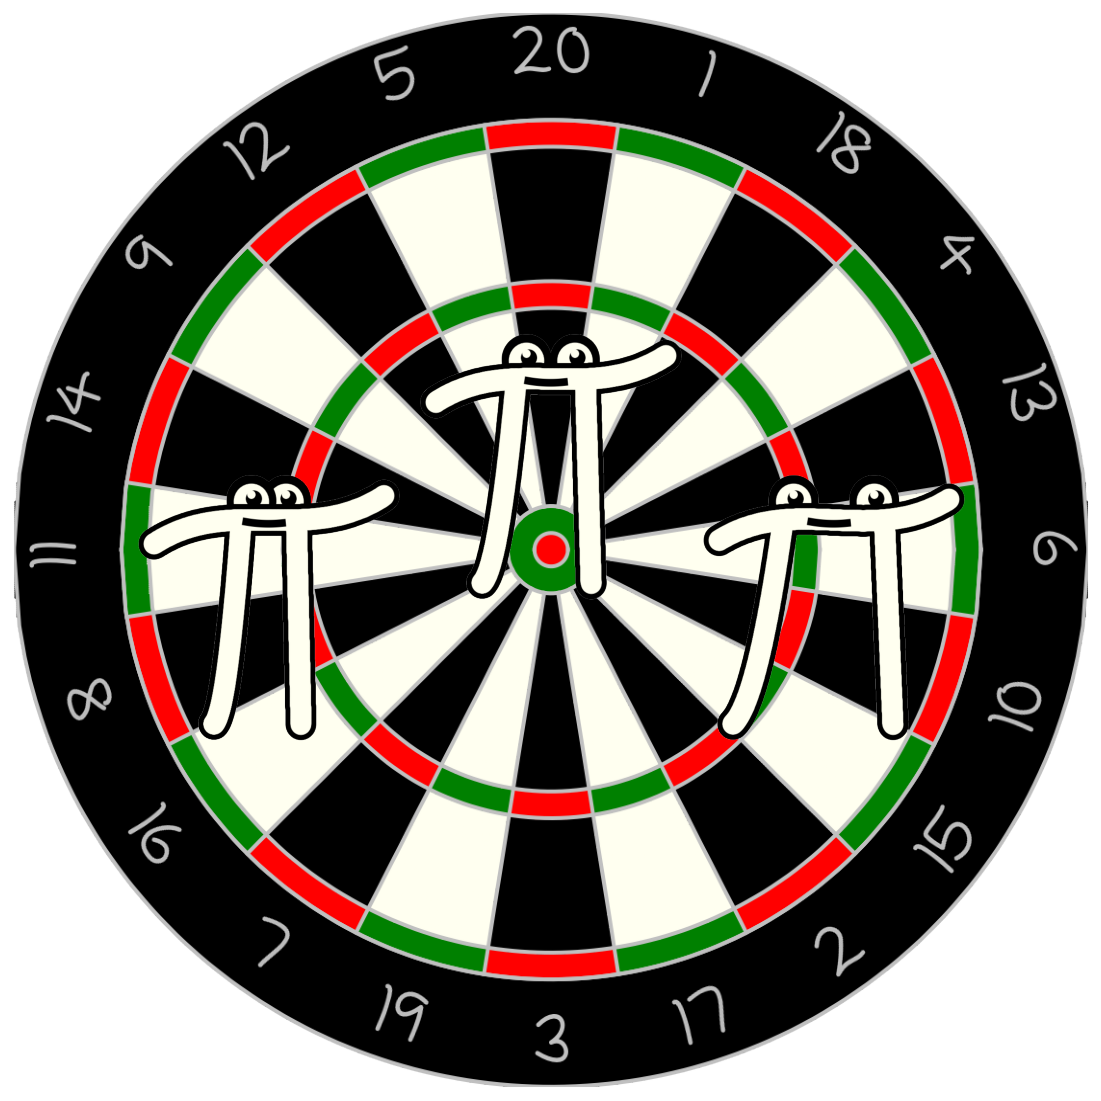

In [9]:
for a100 in 12, 15, 22:
    savePiCreatureOld(a100/100)

plt.figure(figsize=(20,20))
plt.xlim([-BOARDSIZE, BOARDSIZE])
plt.ylim([-BOARDSIZE, BOARDSIZE])

plt.axis('off')
cfile=plt.imread("images/cibles/1.00.png")
plt.imshow(cfile, extent=[-BOARDSIZE, BOARDSIZE, -BOARDSIZE, BOARDSIZE])
piC=plt.imread("images/piCreatures/0.12.png")
plt.imshow(piC, extent=0.65 * np.array([-1.5, -0.5, -0.7, 0.3]))
piC=plt.imread("images/piCreatures/0.15.png")
plt.imshow(piC, extent=0.65 * np.array([-0.5, 0.5, -0.2, 0.8]))
piC=plt.imread("images/piCreatures/0.22.png")
plt.imshow(piC, extent=0.65 * np.array([0.5, 1.5, -0.7, 0.3]))
plt.xlim([-BOARDSIZE, BOARDSIZE])
plt.ylim([-BOARDSIZE, BOARDSIZE])
# plt.tight_layout()
plt.savefig("images/cibleAndPi.png", transparent=True, bbox_inches='tight')